In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

In [69]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv')

In [71]:
df["Date"]=pd.to_datetime(df["Date"])

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    3650 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


In [73]:
df=df.set_index(df["Date"])

In [75]:
df.drop(columns=["Date"],inplace=True)

In [77]:
df

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


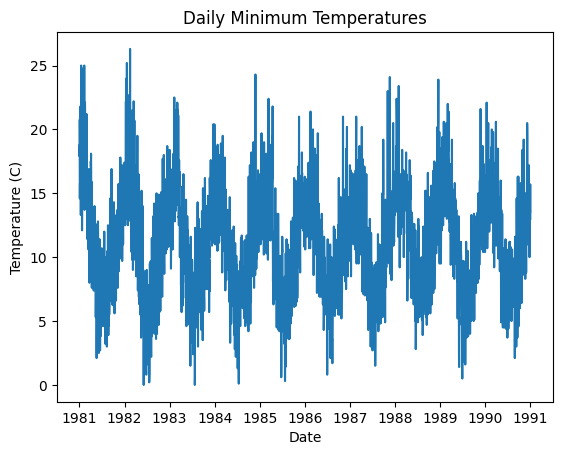

In [78]:
plt.plot(df.index, df['Temp'])
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.title('Daily Minimum Temperatures')
plt.show()

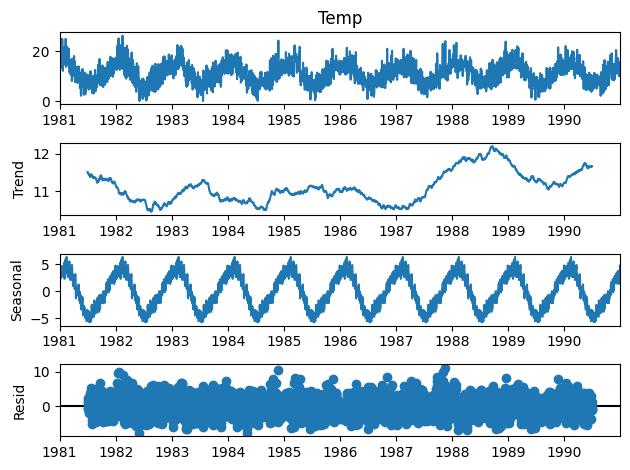

In [79]:
result = seasonal_decompose(df['Temp'], model='additive', period=365)
result.plot()
plt.show()

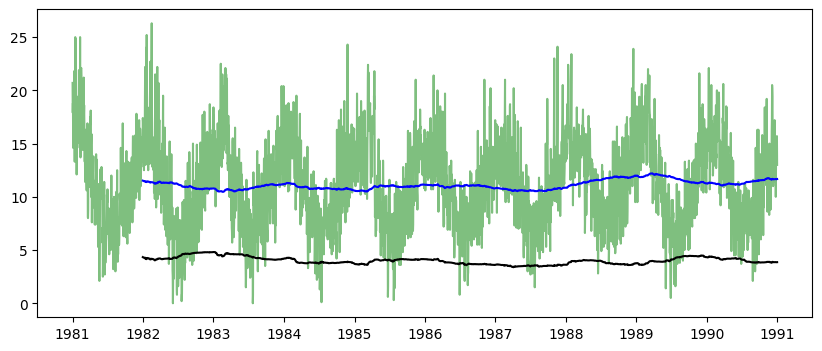

In [80]:
rolling_mean = df.rolling(window = 365).mean()
rolling_std = df.rolling(window = 365).std()
plt.figure(figsize = (10,4))
plt.plot(df,color = 'green',alpha = 0.5,label = 'Original data')
plt.plot(rolling_mean,color = 'blue', label = 'Rolling mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling deviation')

In [81]:
result = adfuller(df['Temp'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -4.4448049246117
p-value: 0.0002470826300360994
Critical Values: {'1%': -3.4321532327220154, '5%': -2.862336767636517, '10%': -2.56719413172842}


In [37]:
#it is stationary

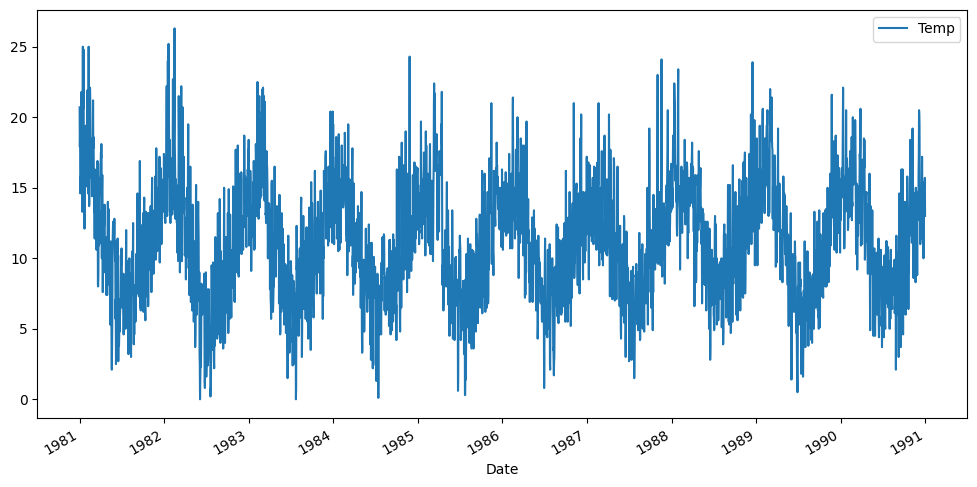

In [82]:
df.plot(figsize=(12, 6))
plt.show()

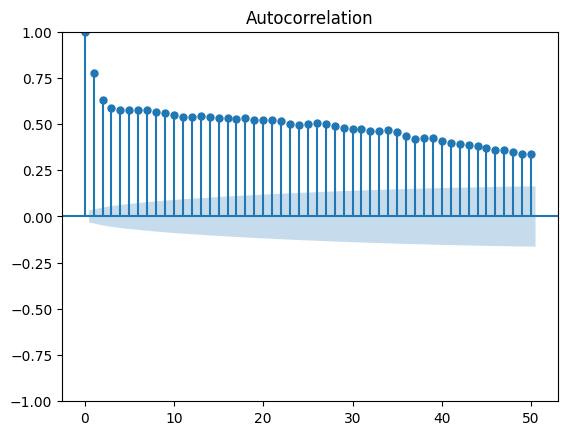

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


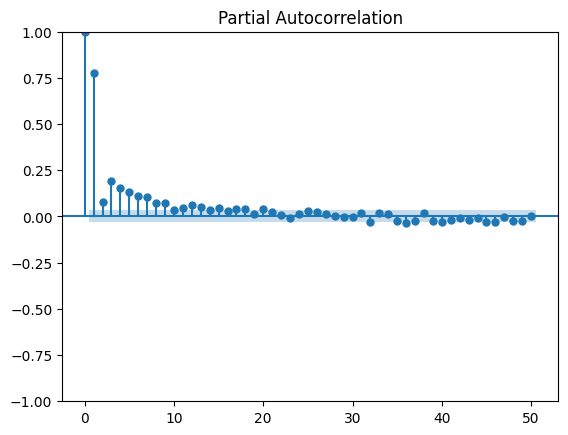

In [83]:
plot_acf(df['Temp'], lags=50)
plt.show()
plot_pacf(df['Temp'], lags=50)
plt.show()

In [84]:
model = ARIMA(df['Temp'],order=(1, 1, 1))
model_fit = model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [86]:
result=model_fit.forecast(365)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [90]:
result=pd.DataFrame(result)

In [91]:
result.columns=["Temp"]

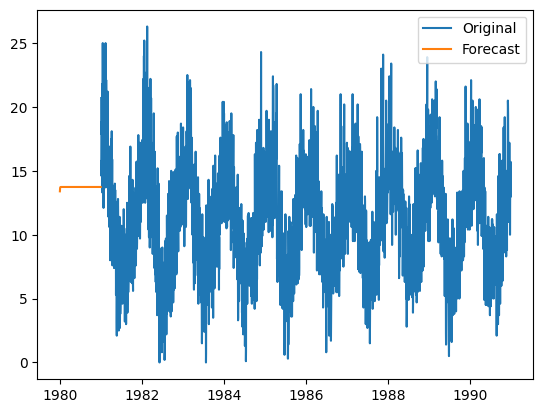

In [93]:
plt.plot(df.index, df['Temp'], label='Original')
plt.plot(result, label='Forecast')
plt.legend()
plt.show()